<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7/29_doc2vec_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""6-16.doc2vec_class.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1VQvAP9FPRGIoQ_iZtTT2wrg6isVn3yyF
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pickle
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# %cd '/content/drive/MyDrive/Colab Notebooks'

with open('/content/drive/MyDrive/머신러닝/Doc2vec/pv_dm_D.pkl', 'rb') as f:
    _, D_array, y_data = pickle.load(f)

n_topic = len(set(y_data[:, 0]))
x_train, x_test, y_train, y_test = train_test_split(D_array, y_data, test_size=0.2)

In [ ]:
# FNN 모델을 생성한다.
x_input = Input(batch_shape = (None, 400))
h_layer = Dense(50, activation='relu', kernel_regularizer=l2(0.005))(x_input)
y_output = Dense(n_topic, activation='softmax', kernel_regularizer=l2(0.005))(h_layer)
model = Model(x_input, y_output)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0005))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                20050     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
Total params: 21,070
Trainable params: 21,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델을 학습한다.
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 128, epochs = 50)

Epoch 1/50
67/67 [==============================] - 2s 4ms/step - loss: 3.5341 - val_loss: 3.4226
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 3.3042 - val_loss: 3.2516
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 3.1119 - val_loss: 3.0862
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 2.9198 - val_loss: 2.9131
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 2.7251 - val_loss: 2.7407
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 2.5409 - val_loss: 2.5844
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 2.3811 - val_loss: 2.4562
Epoch 8/50
67/67 [==============================] - 0s 2ms/step - loss: 2.2509 - val_loss: 2.3583
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 2.1496 - val_loss: 2.2838
Epoch 10/50
67/67 [==============================] - 0s 2ms/step - loss: 2.0716 - val_loss: 2.2315
Epoch 11/50
67/67 [

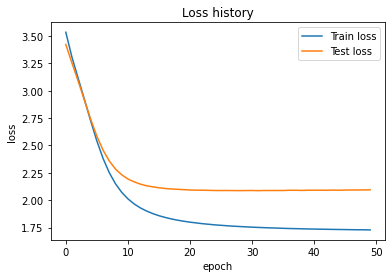

In [ ]:
# Loss history를 그린다
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# 시험 데이터로 학습 성능을 평가한다
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1).reshape(-1, 1)
accuracy = (y_pred == y_test).mean()
print("\nAccuracy = %.2f %s" % (accuracy * 100, '%'))


Accuracy = 60.71 %
